# DATA COLLECTION AND PREPROCESSING

importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading DataFrame

concrete =pd.read_excel(r"c://users/danhaya/arewads/concrete_research/data/Concrete_Data.xls")
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [12]:
for ingredient in concrete.columns:
    print(ingredient)

Cement (component 1)(kg in a m^3 mixture)
Blast Furnace Slag (component 2)(kg in a m^3 mixture)
Fly Ash (component 3)(kg in a m^3 mixture)
Water  (component 4)(kg in a m^3 mixture)
Superplasticizer (component 5)(kg in a m^3 mixture)
Coarse Aggregate  (component 6)(kg in a m^3 mixture)
Fine Aggregate (component 7)(kg in a m^3 mixture)
Age (day)
Concrete compressive strength(MPa, megapascals) 


Check for missing values

In [3]:
print(concrete.isna().sum())

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


This dataset has no missing values.

### `Check Duplicates`

In [4]:
print(concrete.duplicated().sum())

25


There are 25 duplicates entries in this dataset. let me drop me them

In [5]:
concrete = concrete.drop_duplicates()
print(concrete.duplicated().sum())

0


### `Handling outliers`

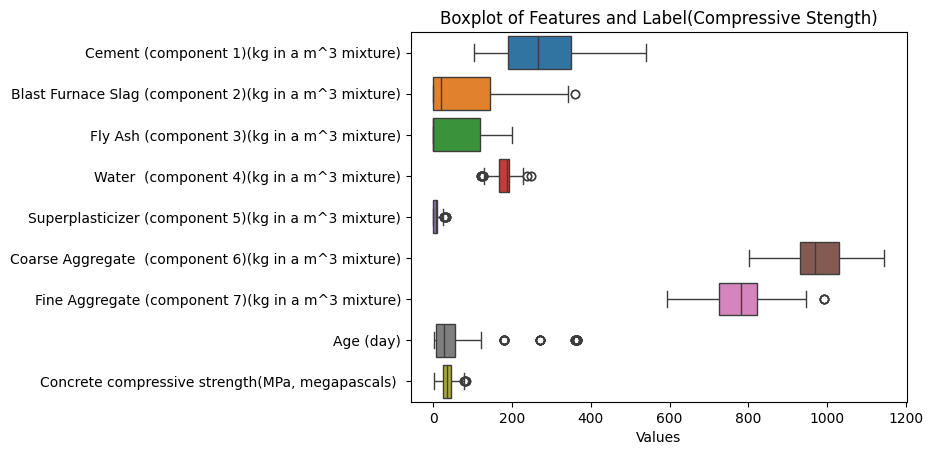

In [8]:
sns.boxplot(data=concrete, orient='h')
plt.xlabel('Values')
plt.title("Boxplot of Features and Label(Compressive Stength)")
plt.show()

In [9]:
concrete.shape

(1005, 9)

In [21]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              0 non-null      float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  0 non-null      float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             0 non-null      float64
 3   Water  (component 4)(kg in a m^3 mixture)              0 non-null      float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    0 non-null      float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   0 non-null      float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      0 non-null      float64
 7   Age (day)                                              0 non-null      int64  
 8   Concrete compressive strength(MPa, megapascals)        0 non-null   

In [27]:
print(concrete.shape)


(1005, 9)


In [6]:
col_list = list(concrete.columns)
print(col_list)

['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)', 'Concrete compressive strength(MPa, megapascals) ']


In [7]:
from scipy.stats import iqr
import numpy as np

# Make a copy to keep original safe
df = concrete.copy()


mask = np.ones(len(df), dtype=bool)

for col in col_list:
    data = df[col].values
    col_iqr = iqr(data)
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    lower_threshold = q1 - 1.5 * col_iqr
    upper_threshold = q3 + 1.5 * col_iqr
    
    # Update mask
    mask &= (data >= lower_threshold) & (data <= upper_threshold)

# Apply mask once
df_clean = df[mask]

print("Original shape:", concrete.shape)
print("After removing outliers:", df_clean.shape)


Original shape: (1005, 9)
After removing outliers: (911, 9)


In [9]:
#create new column called water-cement ratio
df_clean['water_cement_ratio'] = df_clean['Water  (component 4)(kg in a m^3 mixture)'] / df_clean['Cement (component 1)(kg in a m^3 mixture)']
df_clean.head()

C:\Users\Danhaya\AppData\Local\Temp\ipykernel_932\1315193010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['water_cement_ratio'] = df_clean['Water  (component 4)(kg in a m^3 mixture)'] / df_clean['Cement (component 1)(kg in a m^3 mixture)']


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)",water_cement_ratio
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.300000
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847,0.857143
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770,0.600000
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291,0.857143
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790,0.480000


In [13]:
df_clean.to_csv("clean_data.csv", index=False)